# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [95]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
api_key

'01735b6e547ab3555bd98bdf6c4513c5'

## Generate Cities List

In [96]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

In [97]:
cities
df_cities = pd.DataFrame(cities,columns=["city"])
df_cities.head()

,city
0,faanui
1,klaksvik
2,carnarvon
3,mweka
4,new norfolk


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [98]:
df_cities = pd.DataFrame(cities,columns=["city"])
#df_cities = df_cities.sample(n=500)


df_cities["cloudiness"] = ""
df_cities["country"] = ""
df_cities["date"] = ""
df_cities["humidity"] = ""
df_cities["lats"] = ""
df_cities["lngs"] = ""
df_cities["maxtemp"] = ""
df_cities["windspeed"] = ""

rowcount = 0

for index, row in df_cities.iterrows():
    city = row["city"]
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    
    print(f"Now retrieving city #{rowcount}")
    rowcount += 1

    query_url = f"{url}appid={api_key}&units=imperial&q={city}"
    response = requests.get(query_url)
    print(response.url)
    response = response.json()
    
    try:
        tbl_cities = response["name"]
        cloudiness = response["clouds"]["all"]
        country = response["sys"]["country"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        latitude = response["coord"]["lat"]
        longitude = response["coord"]["lon"]
        maxtemp = response["main"]["temp_max"]
        windspeed = response["wind"]["speed"]
        
        df_cities.loc[index, "city"] = tbl_cities
        df_cities.loc[index, "cloudiness"] = cloudiness
        df_cities.loc[index, "country"] = country
        df_cities.loc[index, "date"] = "08/24/2019"
        df_cities.loc[index, "humidity"] = humidity
        df_cities.loc[index, "lats"] = latitude
        df_cities.loc[index, "lngs"] = longitude
        df_cities.loc[index, "maxtemp"] = maxtemp
        df_cities.loc[index, "windspeed"] = windspeed
        
    except (KeyError, IndexError):
        print("Error with city data. Skipping.")
        
        df_cities.drop(labels=index, inplace=True)

df_cities

#pprint(weather_json)

Now retrieving city #0
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=faanui
Now retrieving city #1
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=klaksvik
Now retrieving city #2
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=carnarvon
Now retrieving city #3
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=mweka
Now retrieving city #4
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=new%20norfolk
Now retrieving city #5
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=port%20elizabeth
Now retrieving city #6
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=saint-philippe
Now retrieving city #7
http://api.openwe

http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=puerto%20ayora
Now retrieving city #61
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=santa%20eulalia%20del%20rio
Error with city data. Skipping.
Now retrieving city #62
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=lovozero
Now retrieving city #63
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=vanimo
Now retrieving city #64
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=aban
Error with city data. Skipping.
Now retrieving city #65
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=qaqortoq
Now retrieving city #66
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&

http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=sept-iles
Now retrieving city #119
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=pevek
Now retrieving city #120
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=waipawa
Now retrieving city #121
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=amderma
Error with city data. Skipping.
Now retrieving city #122
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=bintulu
Now retrieving city #123
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=geraldton
Now retrieving city #124
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=hasaki
Now retrieving city #125
http://api.open

http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=port%20alfred
Now retrieving city #178
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=wanning
Now retrieving city #179
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=vaitupu
Error with city data. Skipping.
Now retrieving city #180
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=hobart
Now retrieving city #181
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=richards%20bay
Now retrieving city #182
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=rio%20cuarto
Now retrieving city #183
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=bambous%20virieux
Now retrieving

http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=wankaner
Now retrieving city #237
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=sestri%20levante
Now retrieving city #238
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=kloulklubed
Now retrieving city #239
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=san%20cristobal
Now retrieving city #240
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=umm%20lajj
Now retrieving city #241
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=ambanja
Now retrieving city #242
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=sur
Now retrieving city #243
http://api.openweathermap.o

http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=atar
Now retrieving city #296
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=cabo%20san%20lucas
Now retrieving city #297
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=saint-francois
Now retrieving city #298
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=ahipara
Now retrieving city #299
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=acari
Now retrieving city #300
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=te%20anau
Now retrieving city #301
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=ladario
Now retrieving city #302
http://api.openweathermap.org/dat

http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=le%20port
Now retrieving city #355
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=yamethin
Now retrieving city #356
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=nerchinskiy%20zavod
Now retrieving city #357
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=strandby
Now retrieving city #358
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=karamea
Error with city data. Skipping.
Now retrieving city #359
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=axim
Now retrieving city #360
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=shache
Now retrieving city #361
http

http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=pochutla
Now retrieving city #414
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=lethem
Now retrieving city #415
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=kidal
Now retrieving city #416
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=lagoa
Now retrieving city #417
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=zhezkazgan
Now retrieving city #418
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=alofi
Now retrieving city #419
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=scarborough
Now retrieving city #420
http://api.openweathermap.org/data/2.5/weather?

http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=swan%20hill
Now retrieving city #473
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=gat
Now retrieving city #474
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=puerto%20penasco
Now retrieving city #475
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=coria
Now retrieving city #476
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=rehnan
Now retrieving city #477
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=berlevag
Now retrieving city #478
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=tawau
Now retrieving city #479
http://api.openweathermap.org/data/2.5/weat

http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=lerici
Now retrieving city #532
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=constitucion
Now retrieving city #533
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=livingston
Now retrieving city #534
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=bur%20gabo
Error with city data. Skipping.
Now retrieving city #535
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=saint-pierre
Now retrieving city #536
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=barranca
Now retrieving city #537
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=viedma
Now retrieving city #538
h

http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=cascais
Now retrieving city #592
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=hashimoto
Now retrieving city #593
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=arauca
Now retrieving city #594
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=nabinagar
Now retrieving city #595
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=nokha
Now retrieving city #596
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=san%20juan
Now retrieving city #597
http://api.openweathermap.org/data/2.5/weather?appid=01735b6e547ab3555bd98bdf6c4513c5&units=imperial&q=loudi
Now retrieving city #598
http://api.openweathermap.org/data/2.5/weather

,city,cloudiness,country,date,humidity,lats,lngs,maxtemp,windspeed
0,Faanui,0,PF,08/24/2019,65,-16.48,-151.75,78.42,7.45
1,Klaksvik,34,FO,08/24/2019,93,62.23,-6.59,51.8,3.36
2,Carnarvon,0,ZA,08/24/2019,28,-30.97,22.13,52.37,7.56
3,Mweka,35,CD,08/24/2019,33,-4.85,21.56,71.99,3.02
4,New Norfolk,75,AU,08/24/2019,50,-42.78,147.06,52,11.41
5,Port Elizabeth,20,US,08/24/2019,87,39.31,-74.98,72,3.4
6,Saint-Philippe,1,CA,08/24/2019,93,45.36,-73.48,64.99,5.82
7,Aqtobe,0,KZ,08/24/2019,54,50.28,57.21,55.4,4.47
8,Arraial do Cabo,86,BR,08/24/2019,81,-22.97,-42.02,66.9,4.76
9,Lavrentiya,61,RU,08/24/2019,51,65.58,-170.99,58.89,9.6


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [107]:
df_cities.to_csv(output_data_file, encoding="utf-8", index=False)
cities_df = pd.read_csv(output_data_file)
cities_df.count()

city          555
cloudiness    555
country       551
date          555
humidity      555
lats          555
lngs          555
maxtemp       555
windspeed     555
dtype: int64

In [101]:
cities_df.head()

,city,cloudiness,country,date,humidity,lats,lngs,maxtemp,windspeed
0,Faanui,0,PF,08/24/2019,65,-16.48,-151.75,78.42,7.45
1,Klaksvik,34,FO,08/24/2019,93,62.23,-6.59,51.80,3.36
2,Carnarvon,0,ZA,08/24/2019,28,-30.97,22.13,52.37,7.56
3,Mweka,35,CD,08/24/2019,33,-4.85,21.56,71.99,3.02
4,New Norfolk,75,AU,08/24/2019,50,-42.78,147.06,52.00,11.41


In [102]:
nan_country = cities_df["country"]
nan_country

#it says 551 in the count, but 555 over here. Not sure if there is an issue..

0      PF
1      FO
2      ZA
3      CD
4      AU
       ..
550    IN
551    GB
552    US
553    IT
554    CL
Name: country, Length: 555, dtype: object

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

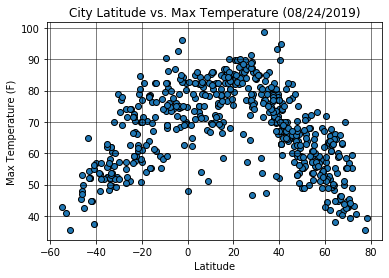

In [103]:
x_axis = cities_df["lats"]
y_axis = cities_df["maxtemp"]

plt.scatter(x_axis,y_axis,marker='o', edgecolors='black')

plt.title("City Latitude vs. Max Temperature (08/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(color="black",linestyle="-",linewidth=0.5)
plt.savefig("output_data/latvstemp.png",bbox_inches="tight")

#### Latitude vs. Humidity Plot

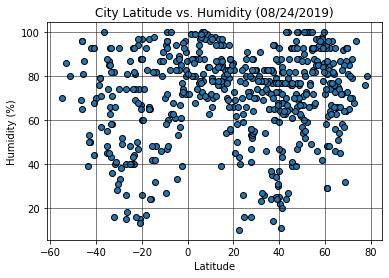

In [104]:
x_axis = cities_df["lats"]
y_axis = cities_df["humidity"]

plt.scatter(x_axis,y_axis,marker='o', edgecolors='black')

plt.title("City Latitude vs. Humidity (08/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="black",linestyle="-",linewidth=0.5)
plt.savefig("output_data/latvshum.png",bbox_inches="tight")

#### Latitude vs. Cloudiness Plot

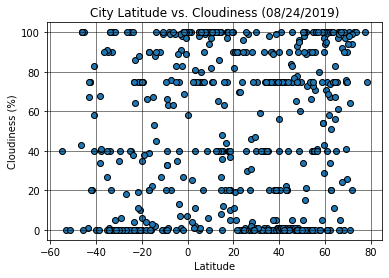

In [105]:
x_axis = cities_df["lats"]
y_axis = cities_df["cloudiness"]

plt.scatter(x_axis,y_axis,marker='o', edgecolors='black')

plt.title("City Latitude vs. Cloudiness (08/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="black",linestyle="-",linewidth=0.5)
plt.savefig("output_data/latvscloud.png",bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

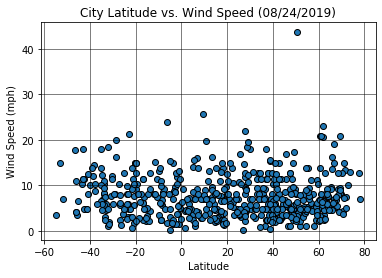

In [106]:
x_axis = cities_df["lats"]
y_axis = cities_df["windspeed"]

plt.scatter(x_axis,y_axis,marker='o', edgecolors='black')

plt.title("City Latitude vs. Wind Speed (08/24/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(color="black",linestyle="-",linewidth=0.5)
plt.savefig("output_data/latvswspeed.png",bbox_inches="tight")